In [1]:
import pandas as pd
from neuralprophet import NeuralProphet

In [2]:
df = pd.read_csv('../example_data/wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


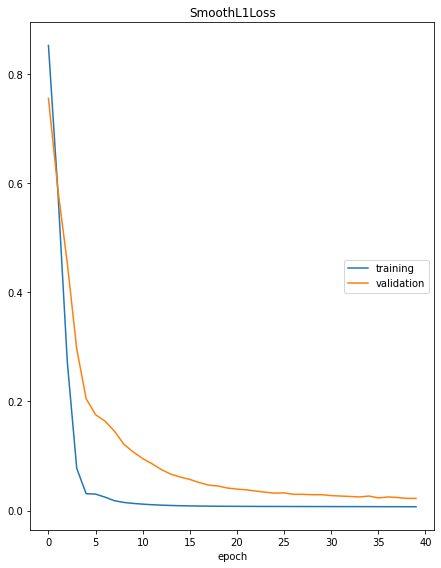

Epoch[40/40]: 100%|██████████| 40/40 [00:03<00:00, 12.20it/s, SmoothL1Loss=0.007, MAE=0.432, RegLoss=0, MAE_val=0.981, SmoothL1Loss_val=0.0223]


,SmoothL1Loss,MAE,RegLoss,SmoothL1Loss_val,MAE_val
0,0.852867,6.470358,0.0,0.755831,5.910858
1,0.585267,4.983552,0.0,0.588695,4.989419
2,0.272389,3.086734,0.0,0.453507,4.442829
3,0.077435,1.563187,0.0,0.296319,3.791514
4,0.030924,1.033698,0.0,0.205031,3.127208


In [3]:
m = NeuralProphet()
metrics = m.fit(df, freq="D", plot_live_loss=True, validate_each_epoch=True)
metrics.head()

In [4]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
future.tail()

,ds,y,t,y_scaled
3265,2017-01-15,NaN,1.397226,NaN
3266,2017-01-16,NaN,1.397646,NaN
3267,2017-01-17,NaN,1.398066,NaN
3268,2017-01-18,NaN,1.398487,NaN
3269,2017-01-19,NaN,1.398907,NaN


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat1']].tail()
# forecast.tail()

,ds,yhat1
3265,2017-01-15,10.166586
3266,2017-01-16,10.450652
3267,2017-01-17,10.267493
3268,2017-01-18,10.072350
3269,2017-01-19,10.068774


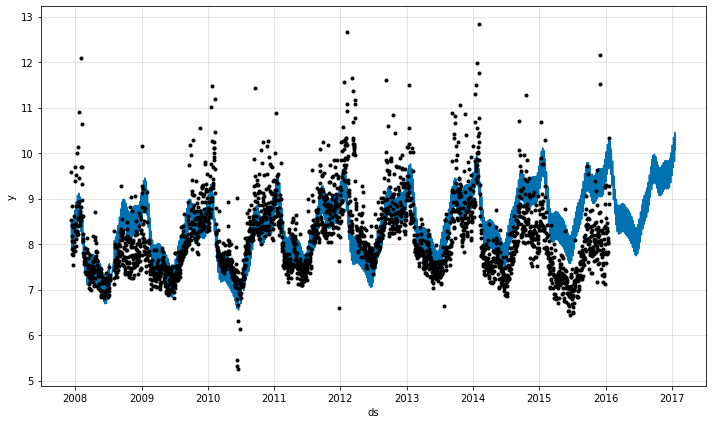

In [6]:
fig = m.plot(forecast)

In [7]:
# fig1 = m.plot_components(forecast, residuals=True)

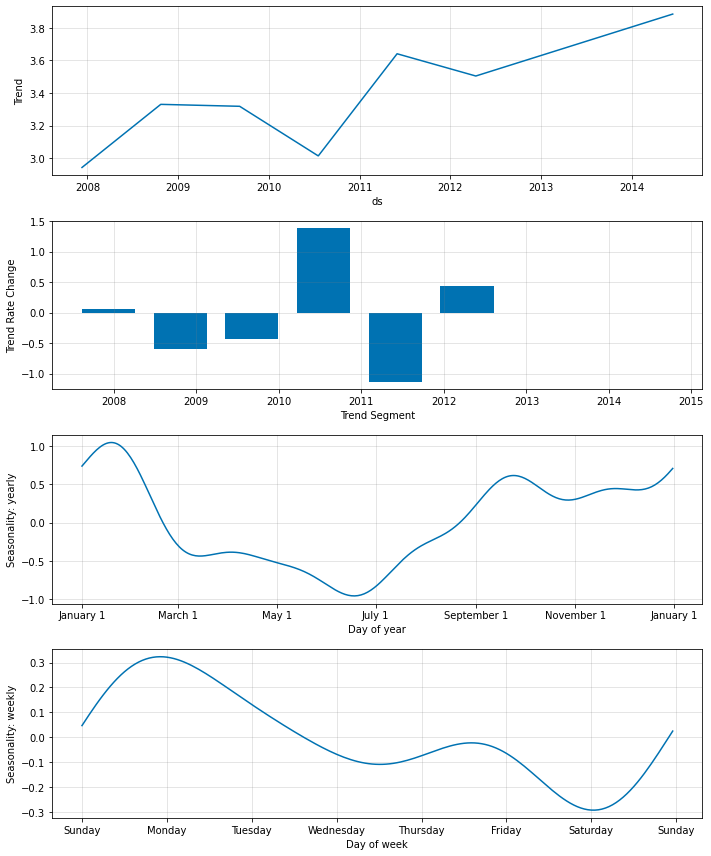

In [8]:
fig2 = m.plot_parameters()

# Adjusting Trend
## Automatic trendpoint selection

In [9]:
m = NeuralProphet(
    n_changepoints=30,
    trend_reg=1.00,
    changepoints_range=0.90,    
)
metrics = m.fit(df, freq="D")
future = m.make_future_dataframe(df, n_historic_predictions=len(df))
forecast = m.predict(future)

INFO: nprophet.config - __post_init__: Note: Trend changepoint regularization is experimental.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
Epoch[40/40]: 100%|██████████| 40/40 [00:02<00:00, 18.66it/s, SmoothL1Loss=0.00641, MAE=0.4, RegLoss=0.00587]  


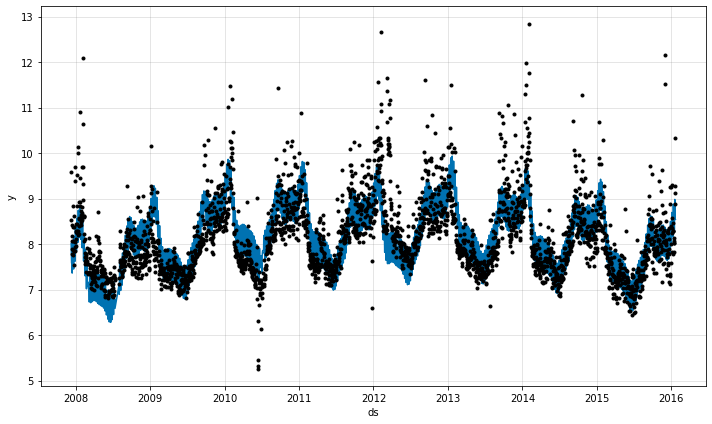

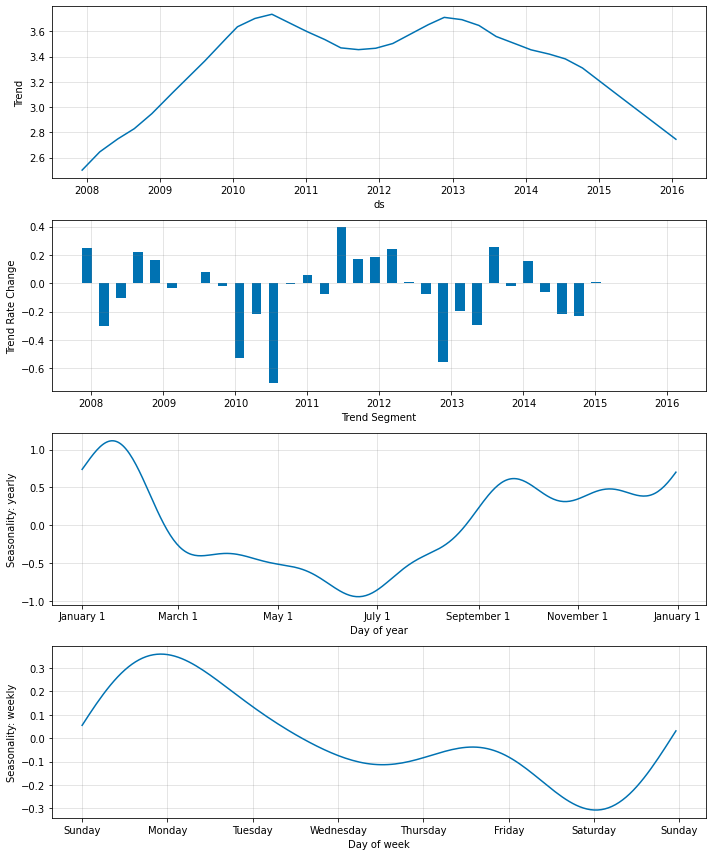

In [10]:
fig3 = m.plot(forecast)
fig4 = m.plot_parameters()

We can adjust the regularization strength to get more or less points with a non-zero rate change.
Note: for too high regularization strengths, the model fitting process becomes unstable.

In [11]:
m = NeuralProphet(
    n_changepoints=30,
    trend_reg=0.20,
    changepoints_range=0.90,    
)
metrics = m.fit(df, freq="D")
future = m.make_future_dataframe(df, n_historic_predictions=len(df))
forecast = m.predict(future)

INFO: nprophet.config - __post_init__: Note: Trend changepoint regularization is experimental.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
Epoch[40/40]: 100%|██████████| 40/40 [00:02<00:00, 18.71it/s, SmoothL1Loss=0.0058, MAE=0.376, RegLoss=0.00127] 


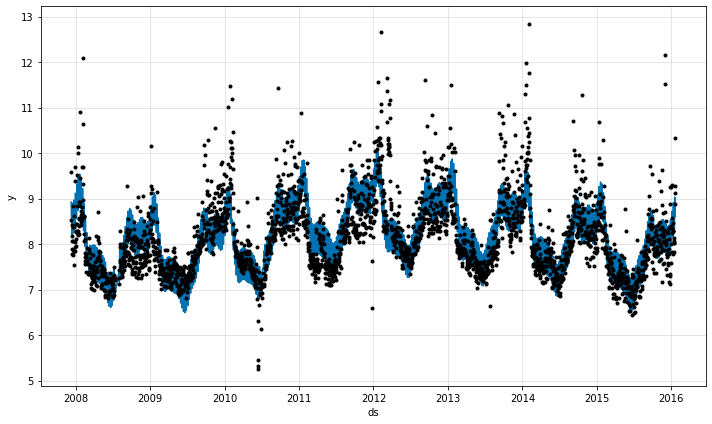

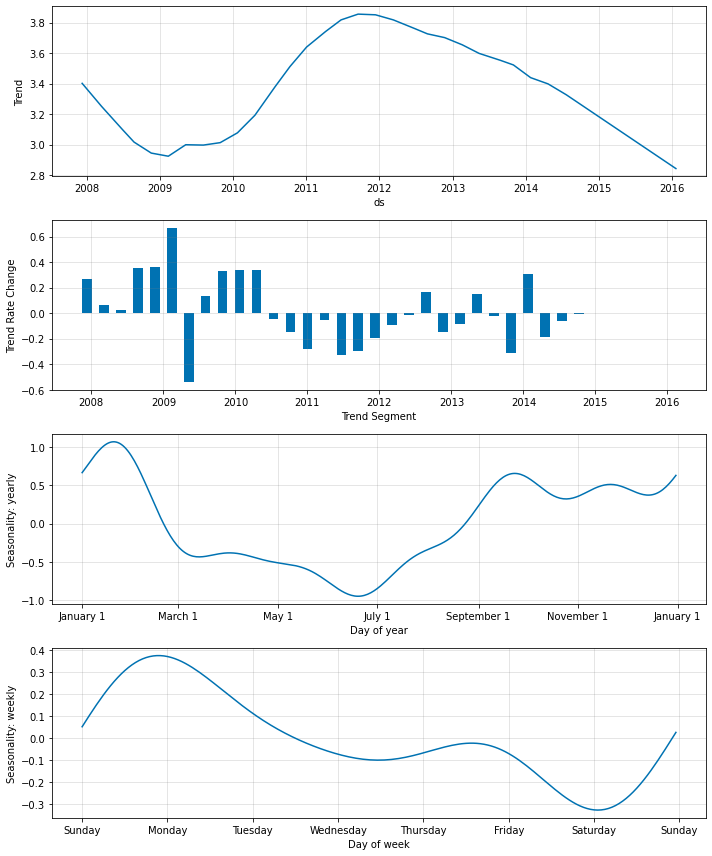

In [12]:
fig3 = m.plot(forecast)
fig4 = m.plot_parameters()

In [13]:
m = NeuralProphet(
    n_changepoints=30,
    trend_reg=2.00,
    changepoints_range=0.90,   
)
metrics = m.fit(df, freq="D")
future = m.make_future_dataframe(df, n_historic_predictions=len(df))
forecast = m.predict(future)

INFO: nprophet.config - __post_init__: Note: Trend changepoint regularization is experimental.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
Epoch[40/40]: 100%|██████████| 40/40 [00:02<00:00, 18.52it/s, SmoothL1Loss=0.00693, MAE=0.423, RegLoss=0.0107]


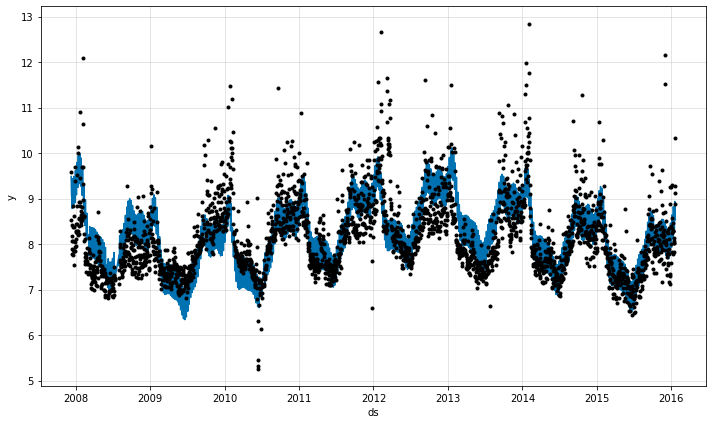

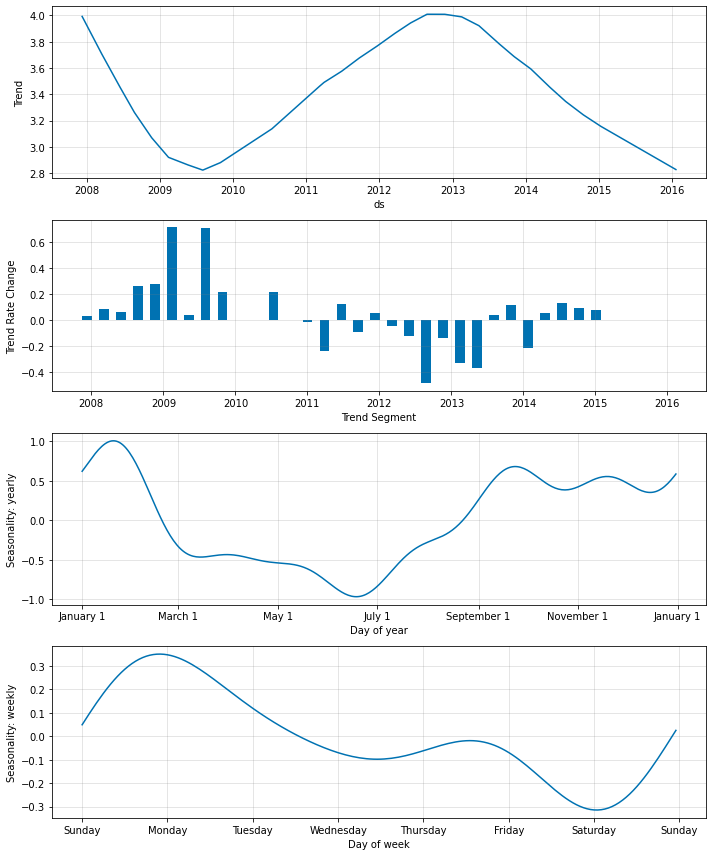

In [14]:
fig3 = m.plot(forecast)
fig4 = m.plot_parameters()